In [222]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt 

import acquire as a
import prepare as p

import warnings
warnings.filterwarnings("ignore")

## Initial Questions

1. Do red or white wines have a higher quality score?
2. Does alchol impact quality positivly or negativly?
3. Does ph level affect the wines differently?
4. Is there a relationship between sugar and quality?

## Acquire

In [2]:
# Load the two CSV files into separate dataframes
red_wine = pd.read_csv("red_wine.csv")
white_wine = pd.read_csv("white_wine.csv")

# Add a new column to each dataframe indicating the type of wine
red_wine["type"] = "red"
white_wine["type"] = "white"

# Concatenate the two dataframes to create a single combined dataframe
wines = pd.concat([red_wine, white_wine])

# Save the combined dataframe to a new CSV file
wines.to_csv("wines.csv", index=False)

In [3]:
wines.shape, red_wine.shape, white_wine.shape

((6497, 13), (1599, 13), (4898, 13))

In [4]:
red_wine.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red


In [5]:
white_wine.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [8]:
wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


## Prepare

In [9]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [10]:
wines.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type']

In [11]:
wines.columns = wines.columns.str.lower().str.replace(' ', '_')

In [12]:
wines.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'type']

In [13]:
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
df = a.get_wine_data()
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
df = p.clean_wine_data(df)
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Split Data

In [16]:
train, validate, test = p.train_val_test(df)
train.shape, validate.shape, test.shape

((4547, 13), (975, 13), (975, 13))

## Data Exploration

### *Do red or white wines have a higher quality score?*


In [278]:
def barplot(df, f1, f2):
    
    sns.set(style="white", rc={"grid.linewidth": 0.0})
    
    sns.barplot(data = df, x = f1, y= f2, color = 'dodgerblue', alpha = .9, ec = 'black',)
    
    plt.title(f'Quality Score Compared To {f1.title()}')
    
    return plt.show()

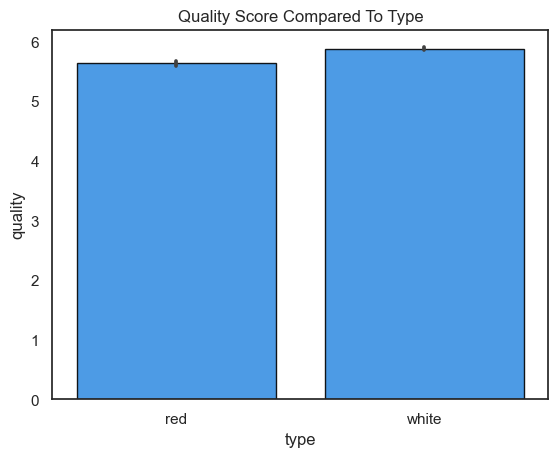

In [285]:
barplot(df, 'type', 'quality')

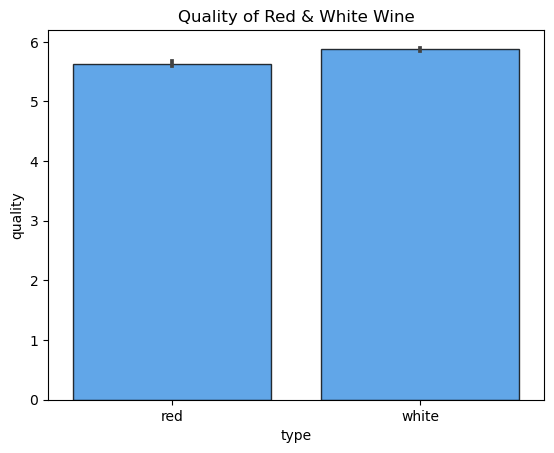

In [17]:
sns.barplot(data = df, x = 'type', y= 'quality', color = 'dodgerblue', alpha = .8, ec = 'black')
plt.title('Quality of Red & White Wine')
plt.show()

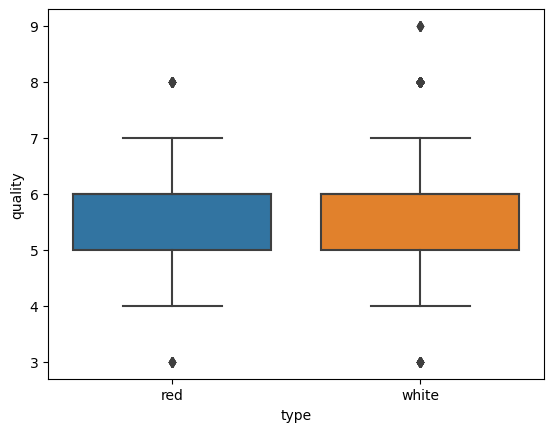

In [18]:
sns.boxplot(data = df, x= 'type', y = 'quality')
plt.show()

$H_0$: Quality is not dependent on type of wine.

$H_a$: Quality is dependent on type of wine.

Confidence Interval 95% <br>
𝜶 = .05

In [24]:
def chi_test(feature, df):
    '''get result of chi-square for a feature to quality'''
    
    𝜶 = .05

    observed = pd.crosstab(df[feature], df.quality)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    if p < 𝜶:
        print("We reject the null hypothesis.")
    else:
        print("We fail to reject the null hypothesis.")

    print(f'chi² = {chi2:.3f}')
    print(f'p = {p:.3}')

In [25]:
chi_test('type', df)

We reject the null hypothesis.
chi² = 116.543
p = 8.66e-23


**Takeaways**

- From the bar chart there seems to be a little difference between quality in the different types of wine, but its unclear
- After running a $chi^2$ test we reject the null hypothesis, meaning quality is dependent on the type of wine

### *Does alcohol impact quality positively or negatively?*

In [286]:
def barplot2(df, f1, f2):
    
    sns.set(style="white", rc={"grid.linewidth": 0.0})
    
    sns.barplot(data = df, x = f1, y= f2, color = 'dodgerblue', alpha = .9, ec = 'black',)
    
    plt.title(f'Quality Score Compared To {f2.title()}')
    
    return plt.show()

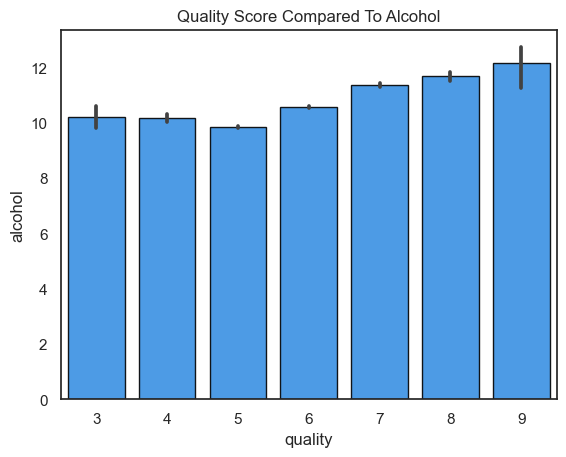

In [287]:
barplot2(df, 'quality' ,'alcohol')

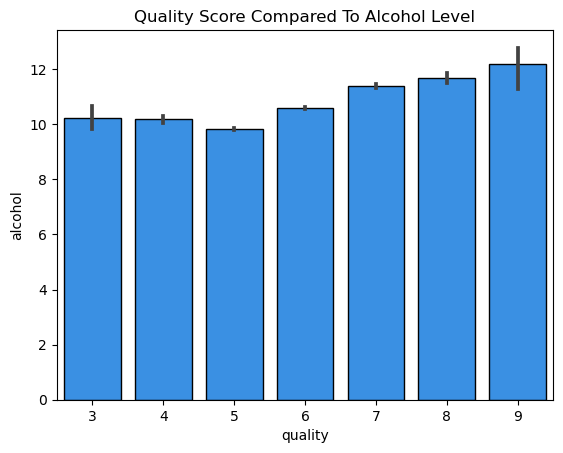

In [35]:
sns.barplot(data = df, x = 'quality', y = 'alcohol', color='dodgerblue', ec = 'black' )
plt.title('Quality Score Compared To Alcohol Level')
plt.show()

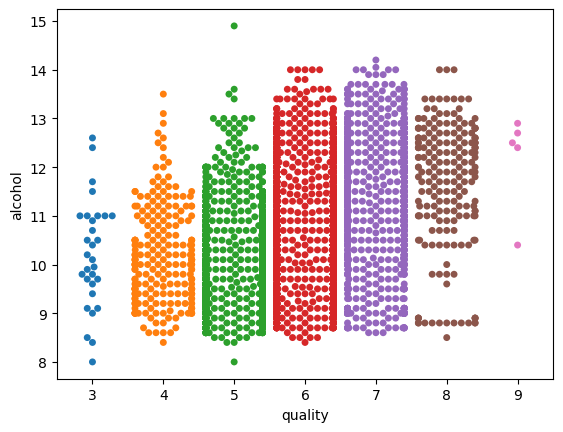

In [36]:
sns.swarmplot(data = df, x= 'quality', y = 'alcohol')
plt.show()

In [38]:
train.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'type']

In [116]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [151]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,scaled_clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


In [120]:
X = df[['alcohol', 'ph']]

In [297]:
def clustering(df, f1, f2):
    
    seed = 22
    
    X = df[[f1, f2]]
    
    kmeans = KMeans(n_clusters = 4, random_state= seed)
    kmeans.fit(X)
    kmeans.predict(X)

    X['unscaled_clusters'] = kmeans.predict(X)
    
    mm_scaler = MinMaxScaler()
    X[[f1, f2]] = mm_scaler.fit_transform(X[[f1, f2]])
    
    kmeans_scale = KMeans(n_clusters = 4, random_state = 22)
    kmeans_scale.fit(X[[f1, f2]])
    kmeans_scale.predict(X[[f1, f2]])
    
    X['scaled_clusters'] = kmeans_scale.predict(X[[f1, f2]])
    
    return X

In [291]:
clustering(df, 'alcohol', 'ph')

,alcohol,ph,unscaled_clusters,scaled_clusters
0,0.202899,0.612403,1,2
1,0.260870,0.372093,3,1
2,0.260870,0.418605,3,1
3,0.260870,0.341085,3,1
4,0.202899,0.612403,1,2
...,...,...,...,...
6492,0.463768,0.426357,2,0
6493,0.231884,0.333333,1,1
6494,0.202899,0.209302,1,1
6495,0.695652,0.480620,0,0


In [123]:
kmeans = KMeans(n_clusters = 4, random_state=22)

kmeans.fit(X)

kmeans.predict(X)


array([1, 3, 3, ..., 1, 0, 2], dtype=int32)

In [124]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,alcohol,ph,unscaled_clusters
0,9.4,3.51,1
1,9.8,3.20,3
2,9.8,3.26,3
3,9.8,3.16,3
4,9.4,3.51,1


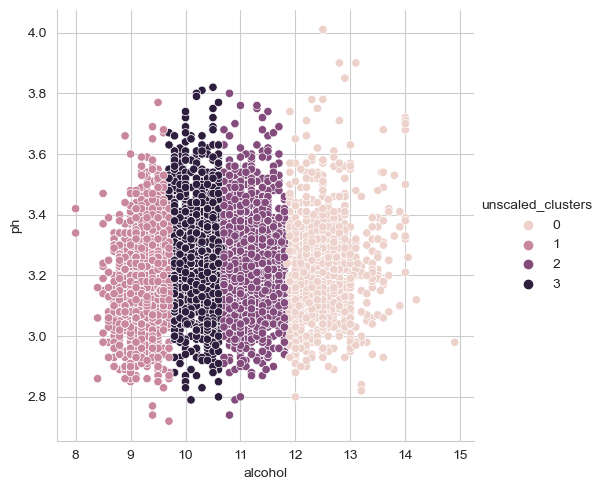

In [125]:
sns.relplot(data=X, x='alcohol', y='ph', hue='unscaled_clusters')
plt.show()

In [126]:
mm_scaler = MinMaxScaler()

X[['alcohol', 'ph']] = mm_scaler.fit_transform(X[['alcohol', 'ph']])

X.head()

,alcohol,ph,unscaled_clusters
0,0.202899,0.612403,1
1,0.260870,0.372093,3
2,0.260870,0.418605,3
3,0.260870,0.341085,3
4,0.202899,0.612403,1


In [127]:
kmeans_scale = KMeans(n_clusters=4, random_state = 22)

kmeans_scale.fit(X[['alcohol', 'ph']])

KMeans(n_clusters=4, random_state=22)

In [128]:
kmeans_scale.predict(X[['alcohol', 'ph']])

array([2, 0, 0, ..., 0, 1, 1], dtype=int32)

In [129]:
X['scaled_clusters'] = kmeans_scale.predict(X[['alcohol', 'ph']])

X.head()

,alcohol,ph,unscaled_clusters,scaled_clusters
0,0.202899,0.612403,1,2
1,0.260870,0.372093,3,0
2,0.260870,0.418605,3,0
3,0.260870,0.341085,3,0
4,0.202899,0.612403,1,2


In [130]:
X['quality'] = df['quality']
X.head()

,alcohol,ph,unscaled_clusters,scaled_clusters,quality
0,0.202899,0.612403,1,2,5
1,0.260870,0.372093,3,0,5
2,0.260870,0.418605,3,0,5
3,0.260870,0.341085,3,0,6
4,0.202899,0.612403,1,2,5


In [298]:
def cluster_relplot(df, f1, f2):
    
    sns.set(style="whitegrid")
    
    X = clustering(df, f1, f2)
    
    sns.relplot(data = X, x = f1, y = f2, hue = 'scaled_clusters')
    
    return plt.show()

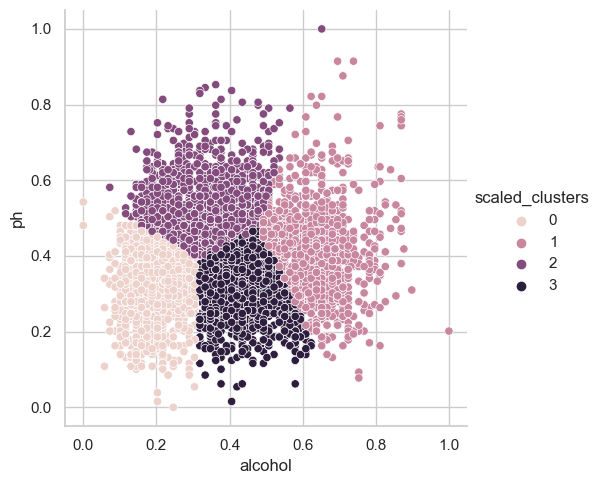

In [299]:
cluster_relplot(df, 'alcohol', 'ph')

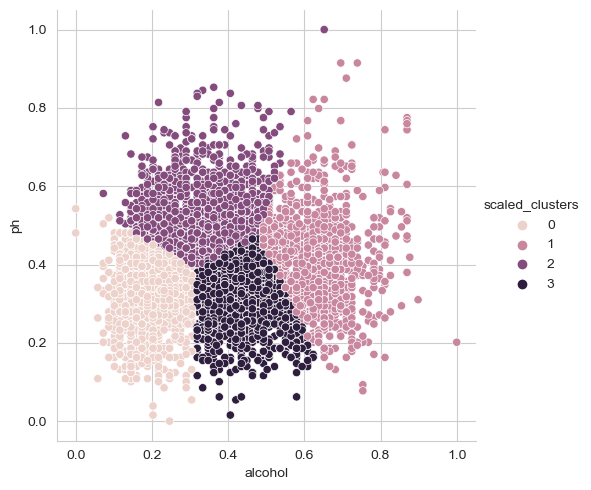

In [131]:
sns.relplot(data = X, x = 'alcohol', y = 'ph', hue = 'scaled_clusters')
plt.show()

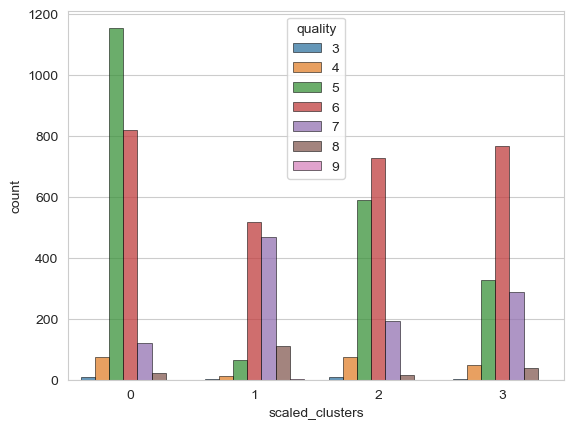

In [132]:
sns.countplot(x='scaled_clusters', hue='quality', data=X, alpha=0.75, linewidth=0.5, edgecolor='black')
plt.show()

In [133]:
kmeans_scale.cluster_centers_

array([[0.19770975, 0.31751685],
       [0.63692569, 0.41543966],
       [0.31779025, 0.52754356],
       [0.43140746, 0.31206239]])

In [134]:
kmeans_scale.inertia_

83.75577626046788

In [135]:
inertia = []
seed = 22 

for n in range(1,11):
    
    kmeans = KMeans(n_clusters = n, random_state = seed)
    
    kmeans.fit(X[['alcohol', 'ph']])
    
    inertia.append(kmeans.inertia_)
    
    
inertia    
    

[295.01521589423425,
 155.35556942544505,
 108.66720603304543,
 83.75577626046788,
 68.68464081543432,
 58.92801923492934,
 51.464169514559046,
 45.722646872669586,
 41.07897222453238,
 37.456250861141314]

In [136]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
                           'inertia': inertia})

results_df

,n_clusters,inertia
0,1,295.015216
1,2,155.355569
2,3,108.667206
3,4,83.755776
4,5,68.684641
5,6,58.928019
6,7,51.464170
7,8,45.722647
8,9,41.078972
9,10,37.456251


In [306]:
def best_cluster(df, f1, f2):
    
    X = clustering(df, f1, f2)
    
    inertia = []
    seed = 22 

    for n in range(1,11):

        kmeans = KMeans(n_clusters = n, random_state = seed)

        kmeans.fit(X[[f1, f2]])

        inertia.append(kmeans.inertia_)
        
        
    results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
                               'inertia': inertia})   
    
    sns.set_style("whitegrid")
    sns.relplot(data = results_df, x='n_clusters', y = 'inertia', kind = 'line')
    plt.xticks(np.arange(0, 11, step=1))
    point = (3, 107) # specify the x and y values of the point to annotate
    plt.annotate("optimal cluster", xy=point, xytext=(5, 125), 
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    return plt.show()


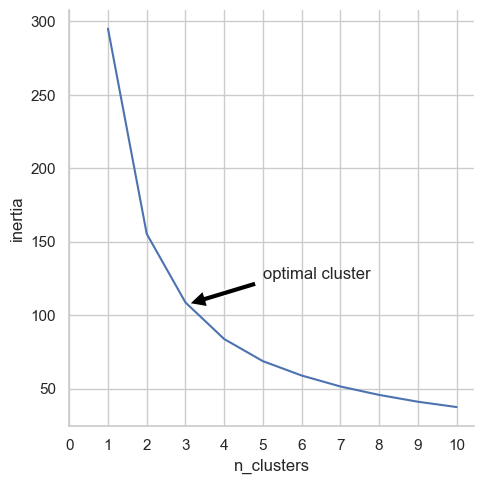

In [307]:
best_cluster(df, 'alcohol', 'ph')

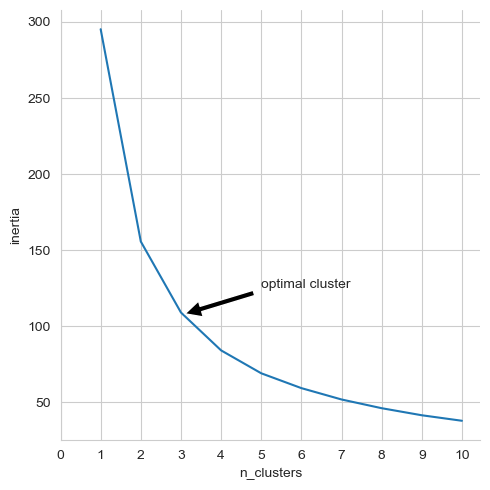

In [143]:
sns.set_style("whitegrid")
sns.relplot(data = results_df, x='n_clusters', y = 'inertia', kind = 'line')
plt.xticks(np.arange(0, 11, step=1))
#plt.yticks(np.arange(0, 18, step=1))
point = (3, 107) # specify the x and y values of the point to annotate
plt.annotate("optimal cluster", xy=point, xytext=(5, 125), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

$H_0$: Quality is not dependent on cluster.

$H_a$: Quality is dependent on cluster.

Confidence Interval 95% <br>
𝜶 = .05

In [138]:
chi_test('scaled_clusters', X)

We reject the null hypothesis.
chi² = 1450.377
p = 2.18e-297


In [139]:
X

,alcohol,ph,unscaled_clusters,scaled_clusters,quality
0,0.202899,0.612403,1,2,5
1,0.260870,0.372093,3,0,5
2,0.260870,0.418605,3,0,5
3,0.260870,0.341085,3,0,6
4,0.202899,0.612403,1,2,5
...,...,...,...,...,...
6492,0.463768,0.426357,2,3,6
6493,0.231884,0.333333,1,0,5
6494,0.202899,0.209302,1,0,6
6495,0.695652,0.480620,0,1,7


In [140]:
# add scaled clusters to dataset, encode clusters and then split
# run models with encoded cluster features

In [308]:
def combined_df(df, f1, f2):
    
    X = clustering(df, f1, f2)
    
    scaled_clusters = X['scaled_clusters']
    df = pd.merge(df, scaled_clusters, left_index=True, right_index=True)
    
    return df

In [309]:
combined_df(df, 'alcohol', 'ph')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,scaled_clusters_x,scaled_clusters_y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,2,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,3,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1,1


In [150]:
scaled_clusters = X['scaled_clusters']
df = pd.merge(df, scaled_clusters, left_index=True, right_index=True)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,scaled_clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


In [152]:
train, validate, test = p.train_val_test(df)
train.shape, validate.shape, test.shape

((4547, 14), (975, 14), (975, 14))

In [212]:
columns_scale = train.iloc[:, :11]
columns_scale.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol']

In [213]:
columns_scale = train.iloc[:, :11]
columns_to_scale = columns_scale.columns

def mvp_scaled_data(train, 
               validate, 
               test, 
               columns_to_scale = columns_to_scale,
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    mms = MinMaxScaler()
    #     fit the thing
    mms.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(mms.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(mms.transform(validate[columns_to_scale]), 
                                                     columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(mms.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [214]:
train_scaled, validate_scaled, test_scaled = mvp_scaled_data(train, validate, test, columns_to_scale = columns_to_scale, return_scaler = False)

train_scaled.shape, validate_scaled.shape, test.shape

((4547, 14), (975, 14), (975, 14))

In [215]:
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,scaled_clusters
2293,0.314050,0.140000,0.349398,0.259202,0.053156,0.173611,0.504608,0.242722,0.330709,0.247191,0.217391,6,white,0
731,0.421488,0.530000,0.078313,0.043712,0.131229,0.010417,0.018433,0.236939,0.551181,0.168539,0.507246,5,red,2
2958,0.223140,0.073333,0.192771,0.012270,0.051495,0.104167,0.290323,0.098130,0.488189,0.179775,0.405797,7,white,2
6396,0.157025,0.166667,0.192771,0.012270,0.056478,0.093750,0.200461,0.049933,0.448819,0.157303,0.623188,6,white,1
2652,0.462810,0.140000,0.331325,0.024540,0.068106,0.055556,0.260369,0.175246,0.299213,0.264045,0.333333,4,white,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,0.206612,0.140000,0.138554,0.208589,0.046512,0.079861,0.214286,0.157509,0.267717,0.089888,0.376812,6,white,3
2550,0.314050,0.093333,0.204819,0.139571,0.043189,0.086806,0.315668,0.181029,0.267717,0.151685,0.260870,6,white,0
537,0.355372,0.496667,0.144578,0.023006,0.124585,0.013889,0.016129,0.194525,0.496063,0.308989,0.391304,6,red,2
1220,0.586777,0.160000,0.313253,0.018405,0.204319,0.055556,0.087558,0.197224,0.425197,0.308989,0.507246,6,red,1


In [258]:
def splitting_subsets(train, train_scaled, validate_scaled, test_scaled):
    
    X_train = train_scaled.drop(columns = ['quality'])
    X_train = pd.get_dummies(X_train, columns = ['type', 'scaled_clusters'])
    y_train = train_scaled['quality']


    X_validate = validate_scaled.drop(columns = ['quality'])
    X_validate = pd.get_dummies(X_validate, columns = ['type', 'scaled_clusters'])
    y_validate = validate_scaled['quality']


    X_test = test_scaled.drop(columns = ['quality'])
    X_test = pd.get_dummies(X_test, columns = ['type', 'scaled_clusters'])
    y_test = test_scaled['quality']

    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [259]:
X_train, y_train, X_validate, y_validate, X_test, y_test = splitting_subsets(train, train_scaled, validate_scaled, test_scaled)

In [260]:
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,type_red,type_white,scaled_clusters_0,scaled_clusters_1,scaled_clusters_2,scaled_clusters_3
2293,0.314050,0.140000,0.349398,0.259202,0.053156,0.173611,0.504608,0.242722,0.330709,0.247191,0.217391,0,1,1,0,0,0
731,0.421488,0.530000,0.078313,0.043712,0.131229,0.010417,0.018433,0.236939,0.551181,0.168539,0.507246,1,0,0,0,1,0
2958,0.223140,0.073333,0.192771,0.012270,0.051495,0.104167,0.290323,0.098130,0.488189,0.179775,0.405797,0,1,0,0,1,0
6396,0.157025,0.166667,0.192771,0.012270,0.056478,0.093750,0.200461,0.049933,0.448819,0.157303,0.623188,0,1,0,1,0,0
2652,0.462810,0.140000,0.331325,0.024540,0.068106,0.055556,0.260369,0.175246,0.299213,0.264045,0.333333,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,0.206612,0.140000,0.138554,0.208589,0.046512,0.079861,0.214286,0.157509,0.267717,0.089888,0.376812,0,1,0,0,0,1
2550,0.314050,0.093333,0.204819,0.139571,0.043189,0.086806,0.315668,0.181029,0.267717,0.151685,0.260870,0,1,1,0,0,0
537,0.355372,0.496667,0.144578,0.023006,0.124585,0.013889,0.016129,0.194525,0.496063,0.308989,0.391304,1,0,0,0,1,0
1220,0.586777,0.160000,0.313253,0.018405,0.204319,0.055556,0.087558,0.197224,0.425197,0.308989,0.507246,1,0,0,1,0,0


In [219]:
y_train

2293    6
731     5
2958    7
6396    6
2652    4
       ..
5699    6
2550    6
537     6
1220    6
4271    7
Name: quality, Length: 4547, dtype: int64

## Feature Engineering

In [220]:
def select_kbest(x,y,k):
    
    f_selector = SelectKBest(f_regression, k = k)
    
    f_selector.fit(x, y)   
    
    f_select_mask = f_selector.get_support()

    f_selector.transform(x)
    
    
    return x.iloc[:,f_select_mask]

In [223]:
select_kbest(X_train,y_train, 3)

,density,alcohol,scaled_clusters_1
2293,0.242722,0.217391,0
731,0.236939,0.507246,0
2958,0.098130,0.405797,0
6396,0.049933,0.623188,1
2652,0.175246,0.333333,0
...,...,...,...
5699,0.157509,0.376812,0
2550,0.181029,0.260870,0
537,0.194525,0.391304,0
1220,0.197224,0.507246,1


In [224]:
def rfe(x, y, k):
    
    lm = LinearRegression()

    rfe = RFE(lm, n_features_to_select = k)
    
    rfe.fit(x, y)
    
    ranks = rfe.ranking_

    columns = x.columns.tolist()
    
    feature_ranks = pd.DataFrame({'ranking': ranks,
                                 'feature': columns})
    
    return feature_ranks.sort_values('ranking').reset_index().drop(columns = ('index'))

In [226]:
rfe(X_train, y_train, 3)

,ranking,feature
0,1,scaled_clusters_1
1,1,type_red
2,1,type_white
3,2,scaled_clusters_3
4,3,scaled_clusters_2
5,4,scaled_clusters_0
6,5,volatile_acidity
7,6,alcohol
8,7,residual_sugar
9,8,density


## Modeling

In [254]:
def baseline(y_train):
    
    preds_df = pd.DataFrame({'actual': y_train})
    
    preds_df['baseline'] = y_train.mean()
    
    baseline_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.baseline))

    return baseline_rmse

In [255]:
baseline(y_train)

0.8708965618047886

In [227]:
def linear_model(X_train, y_train):
    
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    
    lm_preds = lm.predict(X_train)
    
    preds_df = pd.DataFrame({'actual': y_train,'lm_preds': lm_preds})
    
    lm_rmse = sqrt(mean_squared_error(preds_df['lm_preds'], preds_df['actual']))
    
    df = pd.DataFrame({'model': 'linear', 'linear_rmse': lm_rmse},index=['0']) 
                      
    return df

In [228]:
linear_model(X_train, y_train)

,model,linear_rmse
0,linear,0.732087


In [233]:
def lasso_lars(X_train, y_train):
    metrics = []

    for i in np.arange(0.05, 1, .05):
    
        lasso = LassoLars(alpha = i )
    
        lasso.fit(X_train, y_train)
    
        lasso_preds = lasso.predict(X_train)
        
        preds_df = pd.DataFrame({'actual': y_train})
    
        preds_df['lasso_preds'] = lasso_preds

        lasso_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_preds']))
    
        output = {
                'alpha': i,
                'lasso_rmse': lasso_rmse
                 }
    
        metrics.append(output)

    df = pd.DataFrame(metrics)    
    return df.sort_values('lasso_rmse')

In [234]:
lasso_lars(X_train, y_train)

,alpha,lasso_rmse
0,0.05,0.870897
16,0.85,0.870897
15,0.80,0.870897
14,0.75,0.870897
13,0.70,0.870897
12,0.65,0.870897
11,0.60,0.870897
10,0.55,0.870897
17,0.90,0.870897
9,0.50,0.870897


In [237]:
def tweedie_models(X_train, y_train):
    metrics = []

    for i in range(0, 4, 1):
    
        tweedie = TweedieRegressor(power = i)
    
        tweedie.fit(X_train, y_train)
    
        tweedie_preds = tweedie.predict(X_train)
        
        preds_df = pd.DataFrame({'actual': y_train})
    
        preds_df['tweedie_preds'] = tweedie_preds
    
        tweedie_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.tweedie_preds))
    
        output = {
                'power': i,
                'tweedie_rmse': tweedie_rmse
                 }
    
        metrics.append(output)

    df = pd.DataFrame(metrics)    
    return df.sort_values('tweedie_rmse') 

In [238]:
tweedie_models(X_train, y_train)

,power,tweedie_rmse
1,1,0.794486
0,0,0.838280
2,2,0.838461
3,3,0.863534


In [261]:
def linear_poly(X_train, y_train):
    metrics = []

    for i in range(2,4):

        pf = PolynomialFeatures(degree = i)

        pf.fit(X_train, y_train)

        X_polynomial = pf.transform(X_train)

        lm2 = LinearRegression()

        lm2.fit(X_polynomial, y_train)
        
        preds_df = pd.DataFrame({'actual': y_train})

        preds_df['poly_preds'] = lm2.predict(X_polynomial)

        poly_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['poly_preds']))

        output = {
                'degree': i,
                'poly_rmse': poly_rmse
                 }

        metrics.append(output)

    df = pd.DataFrame(metrics)    
    return df.sort_values('poly_rmse')   

In [262]:
linear_poly(X_train, y_train)

,degree,poly_rmse
1,3,0.595421
0,2,0.721184


In [338]:
def validate_models(X_train, y_train, X_validate, y_validate):
   
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    
    lm_val = lm.predict(X_validate)
    
    val_preds_df = pd.DataFrame({'actual_val': y_validate})
    
    val_preds_df['lm_preds'] = lm_val

    lm_rmse_val = sqrt(mean_squared_error(val_preds_df['actual_val'], val_preds_df['lm_preds']))

    #tweedie model
    
    tweedie = TweedieRegressor(power = 1)
    
    tweedie.fit(X_train, y_train)
    
    tweedie_val = tweedie.predict(X_validate)
    
    val_preds_df['tweedie_preds'] = tweedie_val
    
    tweedie_rmse_val = sqrt(mean_squared_error(val_preds_df.actual_val, val_preds_df.tweedie_preds))
    
    #polynomial model
    
    pf = PolynomialFeatures(degree = 2)
    
    pf.fit(X_train, y_train)
    
    X_train = pf.transform(X_train)
    X_validate = pf.transform(X_validate)
    
    lm2 = LinearRegression()
    
    lm2.fit(X_train, y_train)
    
    val_preds_df['poly_vals'] = lm2.predict(X_validate)
    
    poly_validate_rmse = sqrt(mean_squared_error(val_preds_df.actual_val, val_preds_df['poly_vals']))

    return lm_rmse_val, tweedie_rmse_val, poly_validate_rmse

In [339]:
validate_models(X_train, y_train, X_validate, y_validate)

(0.7503856847524546, 0.8090160072794073, 0.7828867626336734)

In [340]:
def test_model(X_train, y_train, X_test, y_test):
    
    pf = PolynomialFeatures(degree = 3)

    pf.fit(X_train, y_train)
    X_train = pf.transform(X_train)

    X_test = pf.transform(X_test)

    lm = LinearRegression()
    lm.fit(X_train, y_train)

    test_preds_df = pd.DataFrame({'actual_test': y_test})

    test_preds_df['poly_test'] = lm.predict(X_test)

    poly_test_rmse = sqrt(mean_squared_error(test_preds_df.actual_test, test_preds_df['poly_test']))
    
    return poly_test_rmse

In [341]:
test_model(X_train, y_train, X_test, y_test)

0.789498929270909

In [348]:
def best_models(X_train, y_train, X_validate, y_validate):
    
    lm_rmse = linear_model(X_train, y_train).iloc[0,1]
    
    tweedie_rmse = tweedie_models(X_train, y_train).iloc[0,1]
        
    poly_rmse = linear_poly(X_train, y_train).iloc[1,1]
    
    baseline_rmse = baseline(y_train)
    
    lm_rmse_val, tweedie_rmse_val, poly_validate_rmse = validate_models(X_train, y_train, X_validate, y_validate)
    
    df = pd.DataFrame({'model': ['linear', 'tweedie', 'linear_poly', 'baseline'],
                      'train_rmse': [lm_rmse, tweedie_rmse, poly_rmse, baseline_rmse],
                      'validate_rmse': [lm_rmse_val, tweedie_rmse_val, poly_validate_rmse, baseline_rmse]})
    
    df['difference'] = df['train_rmse'] - df['validate_rmse']
    
    return df.sort_values('train_rmse').reset_index().drop(columns = ('index'))

In [349]:
best_models(X_train, y_train, X_validate, y_validate)

,model,train_rmse,validate_rmse,difference
0,linear_poly,0.721184,0.782887,-0.061702
1,linear,0.732087,0.750386,-0.018299
2,tweedie,0.794486,0.809016,-0.014530
3,baseline,0.870897,0.870897,0.000000


In [318]:
def best_model(X_train, y_train, X_validate, y_validate, X_test, y_test):
    
    df = best_models(X_train, y_train, X_validate, y_validate).head(1)
    
    df['test_rmse'] = test_model(X_train, y_train, X_test, y_test)
    
    df = df.drop(columns = ['difference'])

    return df



In [319]:
best_model(X_train, y_train, X_validate, y_validate, X_test, y_test)

,model,train_rmse,validate_rmse,test_rmse
0,linear_poly,0.595421,0.774061,0.789499


In [ ]:
#look at best model function and best models function, decide best model and run it through test function 